In [3]:
import pandas as pd
import numpy as np
import numpy.random as rd
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
dane1 = pd.read_csv('dane_projekt1.csv', sep = ';')
dane = dane1[dane1['wydatki_zyw'] > 0]
dane

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
0,52,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96
1,101,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20
2,146,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41
3,281,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77
4,167,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05
...,...,...,...,...,...,...,...,...,...,...,...
304,209,81.26,179.94,2,1,55,1535.14,1066.30,1,3,249.39
305,136,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83
306,13,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16
308,173,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36


<h1>Zadanie 1</h1>
Obserwacji mamy 310. Jest 7 zmiennych ilościowych: waga, wzorst, wiek, dzieci, dochod, oszczednosci, wydatki wyznosciowe i 3 zmienne jakościowe: płeć, jednoosobowość gospodarstwa, miejsce zamieszkania. 

Nie ma braków danych, ale są w nich błędy: w 6 rekordach wydatki na żywność są ujemne, co jest oczywiście bezsensowne, zatem pomijam te 6 wierszy pozostając z 304 obserwacjami. 

Ujemne oszczędności akceptowałem, bo można je traktować jako dług. 

Obserwacje wagi i wzrostu jak widać poniżej cechują się całkiem  małym odchyleniem, co jest nietypowe. Dziwne jest też to, że kobiety nie są dużo lżejsze od mężczyzn.

Co innego dotyczy oszczędności, dochodu i wydatków na żywność - tutaj wachania są spore.
Wiek i ilość dzieci leżą gdzieś pomiędzy jeśli o odchylenie chodzi.

In [115]:
dane['waga'].describe()

count    304.000000
mean      79.819309
std        3.303614
min       68.890000
25%       77.415000
50%       79.895000
75%       82.142500
max       86.730000
Name: waga, dtype: float64

In [116]:
dane['wzrost'].describe()


count    304.000000
mean     172.805757
std        6.935242
min      155.670000
25%      167.130000
50%      172.890000
75%      178.117500
max      190.790000
Name: wzrost, dtype: float64

In [117]:
dane['dzieci'].describe()


count    304.000000
mean       1.990132
std        1.341112
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: dzieci, dtype: float64

In [118]:
dane['dochod'].describe()


count     304.000000
mean     1389.315724
std       660.781113
min       645.270000
25%       965.830000
50%      1181.350000
75%      1613.947500
max      4780.150000
Name: dochod, dtype: float64

In [119]:
dane['wiek'].describe()


count    304.000000
mean      56.259868
std        6.782444
min       37.000000
25%       51.750000
50%       56.500000
75%       61.000000
max       77.000000
Name: wiek, dtype: float64

In [120]:
dane['oszczednosci'].describe()


count     304.000000
mean      887.975954
std       668.759849
min      -204.240000
25%       384.657500
50%       722.325000
75%      1236.880000
max      3390.590000
Name: oszczednosci, dtype: float64

In [121]:
dane['wydatki_zyw'].describe()


count    304.000000
mean     235.571151
std       57.232769
min       56.270000
25%      204.207500
50%      250.465000
75%      284.110000
max      301.690000
Name: wydatki_zyw, dtype: float64

Wzrokowo widać, że z rozkładu normalnego pochodzi tylko wiek, wzrost, waga i dzieci, a wykresy kwantyl-kwantyl potwierdzają tę hipotezę.
Wykresy dochodu i oszczędosći na wykresie kwantyl-kwantyl przypominają bardziej dodatnią parabolę, a wydatki żywnościowe logarytm.

In [122]:
import plotly.express as px

variables = ['waga', 'wzrost', 'dochod', 'oszczednosci', 'wydatki_zyw', 'wiek', 'dzieci']

for var in variables:
    fig = px.histogram(dane, x=var, nbins=10, title=f'Histogram dla {var}')
    fig.show()


In [123]:
import plotly.graph_objects as go

def plot_qq(data, var):
    sorted_data = np.sort(data[var])
    norm = np.random.normal(0, 1, len(sorted_data))
    norm.sort()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=norm, y=sorted_data, mode='markers', name='Data Points'))
    fig.add_trace(go.Scatter(x=norm, y=norm * np.std(sorted_data) + np.mean(sorted_data), mode='lines', name='Fit'))
    fig.update_layout(title=f'Wykres kwantyl-kwantyl dla {var}', xaxis_title='Theoretical Quantiles', yaxis_title='Sample Quantiles')
    fig.show()

for var in variables:
  plot_qq(dane, var)

Jak widać na mapie poniżej niektóre pary zmiennych cechuje silna korelacja, np. wzrost i wage na poziomie około 50% co intuicyjnie wydaje się rozsądne i w tym teście widać poniżej wyliczoną p-wartość na poziomie poniżej poziomu istotności, czyli korelacja jest istotna statystycznie.

Wydatki na żywność i oszczędności cechuje ujemna korelacja na poziomie -0.4, to oznacza, że im wyższe oszczędności tym mniejsze wydatki na żywność (przeskalowane o stałą 0.4). Tutaj znowu mamy wystarczająco małe p-value, które mówi, że wyniki statystycznie istotne.

Najwięcej ze sobą wspólnego mają jednak dochody i oszczędności - są skorelowane na poziomie aż 95%, co też ma sens. Znowu widać małe p-value, czyli korelacje można uznać za statystycznie istotną.

Istnieje też niemała korelacja dochodów i wydatków żywnościowych, która jest jasną konsekwencją wymnożenia korelacji. Jest ona na poziomie -0.12 i ma też akceptowalnie małe p-value, także można ją uznać za statystycznie istotną.

Natomiast pozostałe testy mają małą korelacje i wysokie p-value, co oznacza brak korelacji no i brak istotności statystycznej wyniku. Czyli tylko te 3 pary zmiennych są mocniej skorelowane.

<h1>Zadanie 2</h1>

In [85]:

correlation_matrix = dane[['waga', 'wzrost', 'dochod', 'oszczednosci', 'wydatki_zyw', 'dzieci']].corr()

fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                labels=dict(x="Zmienna", y="Zmienna", color="Korelacja"),
                title="Heatmap korelacji pomiędzy zmiennymi ilościowymi")
fig.update_xaxes(side="bottom")
fig.show()

In [111]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr


columns = ['waga', 'wzrost', 'dochod', 'oszczednosci', 'wydatki_zyw', 'dzieci']

corr_results = []

# Iteracja przez wszystkie pary zmiennych, aby obliczyć korelację i p-wartości
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        corr, p_value = pearsonr(dane[columns[i]], dane[columns[j]])
        corr_results.append((columns[i], columns[j], corr, p_value))

corr_results_df = pd.DataFrame(corr_results, columns=['Zmienna 1', 'Zmienna 2', 'Korelacja', 'P-Wartość'])

print(corr_results_df)


       Zmienna 1     Zmienna 2  Korelacja      P-Wartość
0           waga        wzrost   0.498522   1.670638e-20
1           waga        dochod   0.076018   1.862089e-01
2           waga  oszczednosci   0.066391   2.484702e-01
3           waga   wydatki_zyw   0.022614   6.945355e-01
4           waga        dzieci   0.021571   7.079598e-01
5         wzrost        dochod  -0.010800   8.512387e-01
6         wzrost  oszczednosci  -0.022263   6.990410e-01
7         wzrost   wydatki_zyw   0.058629   3.082554e-01
8         wzrost        dzieci   0.052082   3.654878e-01
9         dochod  oszczednosci   0.942756  4.523371e-146
10        dochod   wydatki_zyw  -0.120683   3.544803e-02
11        dochod        dzieci  -0.013398   8.160343e-01
12  oszczednosci   wydatki_zyw  -0.382909   4.710852e-12
13  oszczednosci        dzieci  -0.014576   8.001811e-01
14   wydatki_zyw        dzieci   0.075586   1.887311e-01


In [86]:
from scipy.stats import chi2_contingency

def c(x, y):
    contingency_table = pd.crosstab(x, y)

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    return {chi2, p}

variables_pairs = [('plec', 'jednoos'), ('plec', 'miejsce'), ('jednoos', 'miejsce')]

for var1, var2 in variables_pairs:
    v, p = c(dane[var1], dane[var2])
    print(f"Współczynnik korelacji z testu Chi-kwadrat dla {var1} i {var2}: {v:.4f}")

Współczynnik korelacji z testu Chi-kwadrat dla plec i jednoos: 0.1384
Współczynnik korelacji z testu Chi-kwadrat dla plec i miejsce: 0.2234
Współczynnik korelacji z testu Chi-kwadrat dla jednoos i miejsce: 0.5239


Poniżej widać, że między zmiennymi jakościowymi wartość korelacji jest istotnie duża tylko w parze (jednoosobowość, miejce). Czyli istnieje dodatni związek między wielkością miasta, w którym się żyje i tym czy mieszka się samemu na poziomie 0.52.

<h1>Zadanie 3</h1>
Oto wykresy rozrzutu dla zmiennych ilościowych względem wydatków na żywność.

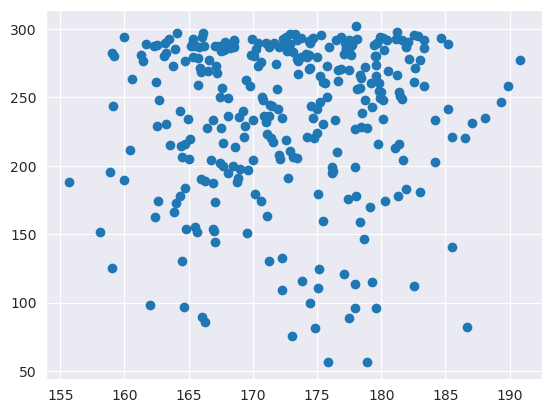

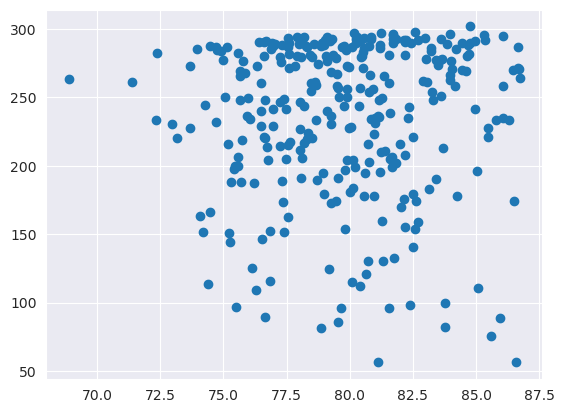

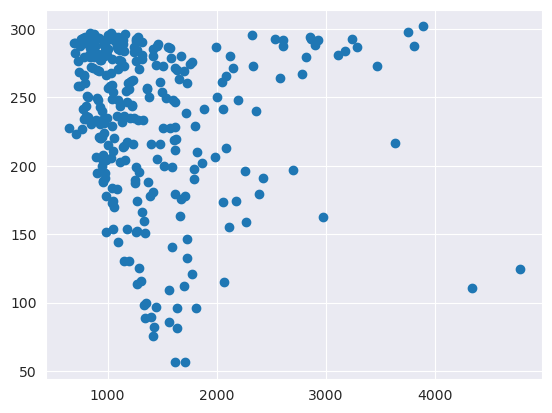

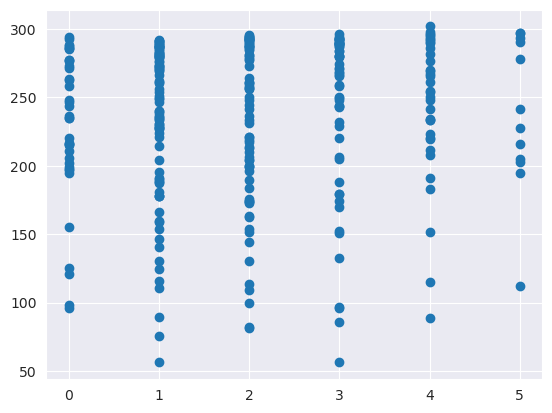

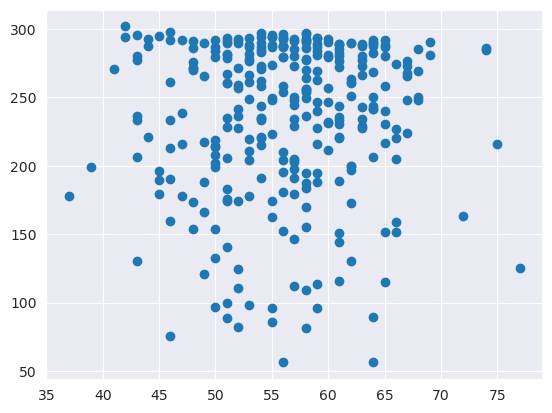

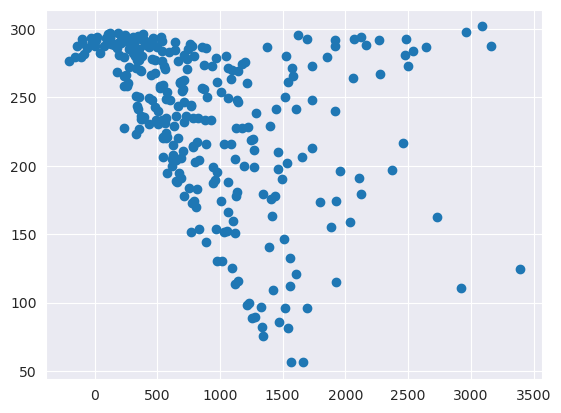

In [87]:
wzrost = dane['wzrost']
waga = dane['waga']
dochod = dane['dochod']
wydatki_zyw = dane['wydatki_zyw']
dzieci = dane['dzieci']
wiek = dane['wiek']
oszczednosci = dane['oszczednosci']



plt.scatter(wzrost, wydatki_zyw)
plt.show()

plt.scatter(waga, wydatki_zyw)
plt.show()

plt.scatter(dochod, wydatki_zyw)
plt.show()

plt.scatter(dzieci, wydatki_zyw)
plt.show()

plt.scatter(wiek, wydatki_zyw)
plt.show()

plt.scatter(oszczednosci, wydatki_zyw)
plt.show()

Warto zobrazować scatterplot zmiennej (dochod - oszczednosci) w zaleznosci od wydatkow na zywnosc. Dane układają się tu w piękną parabolę co przyda nam się bardzo w zadaniu 7.

In [ ]:
dochod = dane['dochod']
wydatki_zyw = dane['wydatki_zyw']
oszczednosci = dane['oszczednosci']
plt.scatter((dochod - oszczednosci), wydatki_zyw)
plt.show()

Oto wykres pudełkowy zmiennej oszczędności względem miejsca zamieszkania respondentów

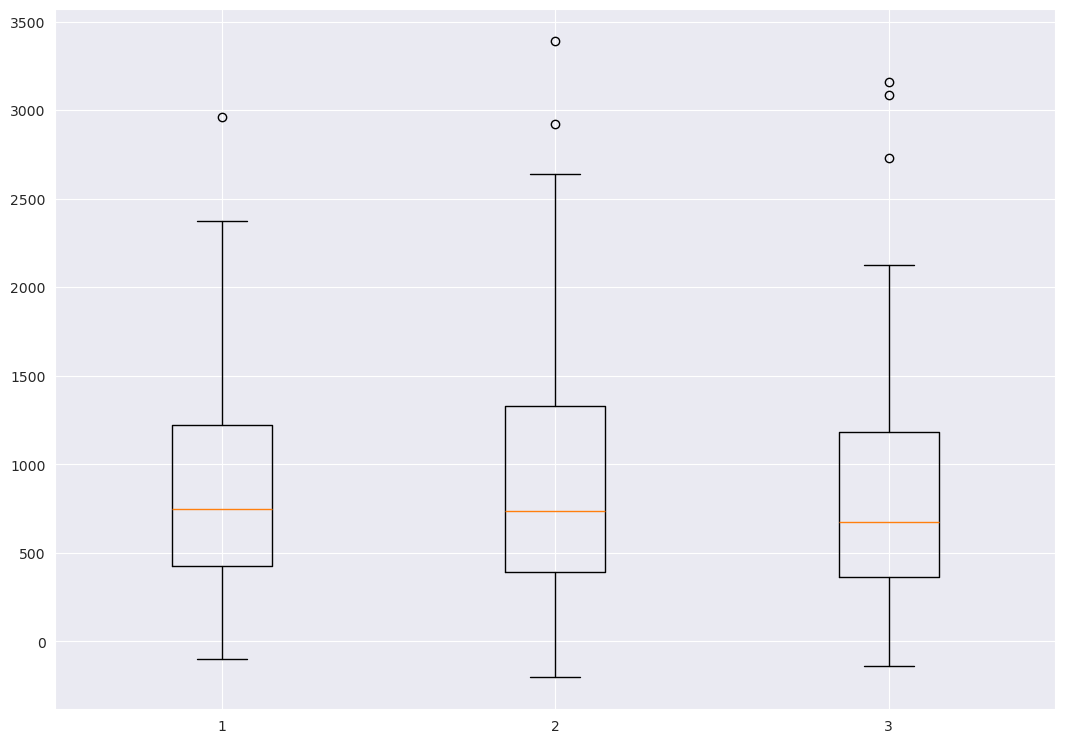

In [88]:
dane1 = dane[dane['miejsce'] == 1]
dane2 = dane[dane['miejsce'] == 2]
dane3 = dane[dane['miejsce'] == 3]

data = [dane1['oszczednosci'], dane2['oszczednosci'], dane3['oszczednosci']]

fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(data)
 
plt.show()

Oto wykres słupkowy skumulowany ukazujący fakt czy respondent prowadzi jednoosobowe gospodarstwo domowe z podziałem na płeć.

/tmp/ipykernel_13201/2392637714.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_13201/2392637714.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_13201/2392637714.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_13201/2392637714.py:18: FutureWarning:

Series.__getitem

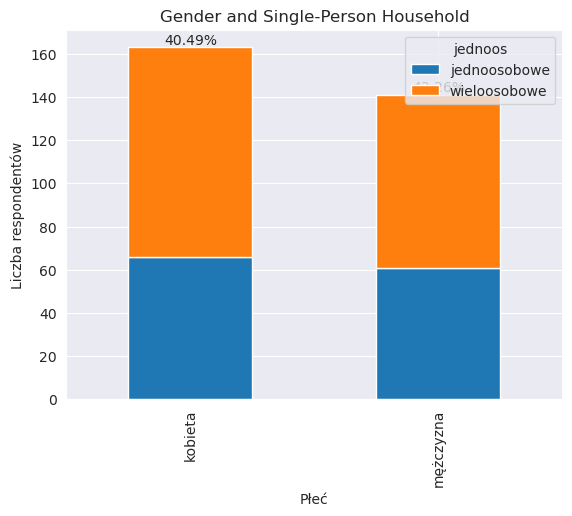

Procent kobieta w jednoosobowych gospodarstwach: 40.49%
Procent mężczyzna w jednoosobowych gospodarstwach: 43.26%


In [89]:
import matplotlib.pyplot as plt

dane1 = pd.read_csv('dane_projekt1.csv', sep = ';')
data = dane1[dane1['wydatki_zyw'] > 0]

data['plec'] = data['plec'].map({1: 'kobieta', 2: 'mężczyzna'})
data['jednoos'] = data['jednoos'].map({1: 'jednoosobowe', 0: 'wieloosobowe'})

pivot_table = data.pivot_table(index='plec', columns='jednoos', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True)
plt.title('Gender and Single-Person Household')
plt.xlabel('Płeć')
plt.ylabel('Liczba respondentów')

percentages = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
single_percentage = percentages['jednoosobowe']
for i, value in enumerate(single_percentage):
    plt.text(i, pivot_table.sum(axis=1)[i], f'{value:.2f}%', ha='center', va='bottom')

plt.show()
for gender, percent in single_percentage.items():
    print(f"Procent {gender} w jednoosobowych gospodarstwach: {percent:.2f}%")



<h1>Zadanie 4</h1>
Licząc wszystkie te wartości przyjmujemy założenie, że zmienna wiek pochodzi z rozkładu normalnego, co jest rozsądnym założeniem jak spojrzy się na wykres wieku albo na wykres kwantyl-kwantyl. Do tego przeprowadzam test Shapiro-Wilka w zadaniu 6, który istotnie potwierdza, że to założenie jest rozsądne.

In [90]:

age = dane['wiek'].values
n = len(age)
n_bootstraps = 10000
alpha = 0.99

bootstrap_samples = np.random.choice(age, (n_bootstraps, n), replace=True)
q1_samples = np.percentile(bootstrap_samples, 25, axis=1)
q2_samples = np.median(bootstrap_samples, axis=1)
q3_samples = np.percentile(bootstrap_samples, 75, axis=1)

q1_ci = np.percentile(q1_samples, [(1 - alpha) / 2 * 100, (1 + alpha) / 2 * 100])
q2_ci = np.percentile(q2_samples, [(1 - alpha) / 2 * 100, (1 + alpha) / 2 * 100])
q3_ci = np.percentile(q3_samples, [(1 - alpha) / 2 * 100, (1 + alpha) / 2 * 100])

print(f"Pzedział ufności dla 1szego kwantyla (Q1): ({q1_ci[0]}, {q1_ci[1]})")
print(f"Przedział ufności dla mediany (Q2): ({q2_ci[0]}, {q2_ci[1]})")
print(f"Przedział ufności dla trzeciego kwantyla (Q3): ({q3_ci[0]}, {q3_ci[1]})")



Pzedział ufności dla 1szego kwantyla (Q1): (50.75, 53.0)
Przedział ufności dla mediany (Q2): (55.0, 58.0)
Przedział ufności dla trzeciego kwantyla (Q3): (59.0, 62.0)


<h1>Zadanie 5</h1>

<Figure size 1000x600 with 0 Axes>

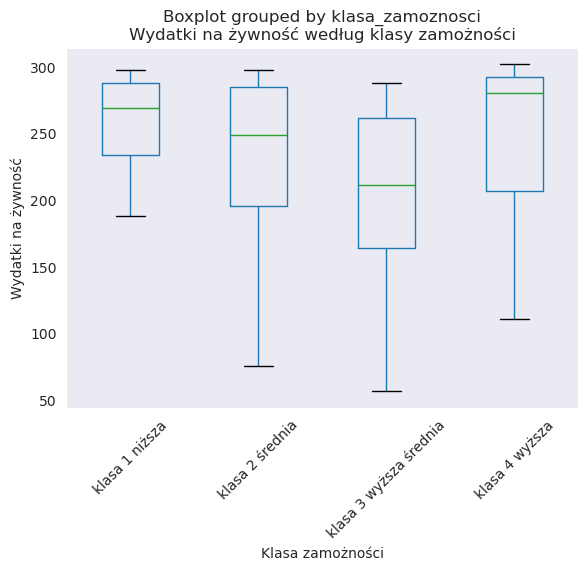

klasa_zamoznosci
klasa 1 niższa            31.333049
klasa 2 średnia           59.344931
klasa 3 wyższa średnia    65.869815
klasa 4 wyższa            56.083263
Name: wydatki_zyw, dtype: float64
count     4.000000
mean     53.157764
std      15.107989
min      31.333049
25%      49.895710
50%      57.714097
75%      60.976152
max      65.869815
Name: wydatki_zyw, dtype: float64


In [91]:
import matplotlib.pyplot as plt


quantiles = dane['dochod'].quantile([0.25, 0.75, 0.90])

conditions = [
    (dane['dochod'] < quantiles[0.25]),
    (dane['dochod'] >= quantiles[0.25]) & (dane['dochod'] < quantiles[0.75]),
    (dane['dochod'] >= quantiles[0.75]) & (dane['dochod'] < quantiles[0.90]),
    (dane['dochod'] >= quantiles[0.90])
]

choices = ['klasa 1 niższa', 'klasa 2 średnia', 'klasa 3 wyższa średnia', 'klasa 4 wyższa']
dane['klasa_zamoznosci'] = np.select(conditions, choices)

grouped = dane.groupby('klasa_zamoznosci')['wydatki_zyw'].std()
description = grouped.describe()

plt.figure(figsize=(10, 6))
dane.boxplot(column='wydatki_zyw', by='klasa_zamoznosci')
plt.title('Wydatki na żywność według klasy zamożności')
plt.xlabel('Klasa zamożności')
plt.ylabel('Wydatki na żywność')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

print(grouped)
print(description)


Odchylenie standardowe jest jedną z najbardziej znanych i używanych miar rozproszenia, która pokazuje, jak bardzo poszczególne wartości zbioru danych różnią się od średniej. W kontekście wydatków na żywność, odchylenie standardowe umożliwia zrozumienie, jak duże są różnice w wydatkach wewnątrz danej klasy zamożności. Jest to szczególnie przydatne, aby zobaczyć, czy większość ludzi w danej klasie wydaje podobne kwoty na żywność, czy też występują duże dysproporcje.

Wariancja, podobnie jak odchylenie standardowe, mierzy rozproszenie danych wokół średniej. Jednakże, ponieważ wariancja jest kwadratem odchylenia standardowego, ma ona kwadrat jednostki pierwotnych danych, co utrudnia bezpośrednią interpretację.

Rozstęp jest bardzo wrażliwy na wartości skrajne i nie daje informacji o rozkładzie danych pomiędzy tymi ekstremami. 

CV jest szczególnie przydatny, gdy chcemy porównać zmienność dwóch lub więcej zestawów danych, które mogą mieć różne średnie. Odchylenie standardowe jest lepsze, gdy porównujemy dane o zbliżonych średnich, a tutaj mamy właśnie taki przypadek.



Dlatego wybrałem odchylenie standardowe jako miarę zróżnicowania.

Klasa 1 niższa

    Średnie wydatki: 258.61
    Odchylenie standardowe: 31.33
    Rozstęp: 187.92 do 296.73

Wydatki na żywność w klasie niższej mają stosunkowo niskie odchylenie standardowe, co wskazuje na mniejsze zróżnicowanie w tej grupie. Wartości skupiają się wokół średniej, z mediana lekko wyższą niż średnia, sugerując lekko prawoskośny rozkład.
Klasa 2 średnia

    Średnie wydatki: 231.23
    Odchylenie standardowe: 59.34
    Rozstęp: 75.27 do 296.80

Klasa średnia charakteryzuje się największym odchyleniem standardowym, co oznacza znaczne zróżnicowanie wydatków na żywność. Minimalne wydatki są bardzo niskie w porównaniu z maksymalnymi, co może wskazywać na duże różnice w dochodach wewnątrz tej klasy.
Klasa 3 wyższa średnia

    Średnie wydatki: 201.49
    Odchylenie standardowe: 65.87
    Rozstęp: 56.27 do 286.98

Ta grupa również wykazuje znaczne zróżnicowanie, z najniższą średnią wydatków i jednym z najwyższych odchyleniem standardowym. Mediana jest wyższa niż średnia, co ponownie sugeruje prawoskośność rozkładu.
Klasa 4 wyższa

    Średnie wydatki: 249.86
    Odchylenie standardowe: 56.08
    Rozstęp: 110.60 do 301.69

Wydatki na żywność w klasie wyższej są stosunkowo wysokie z mniejszym zróżnicowaniem niż w klasie średniej i wyższej średniej. Średnie wydatki są zbliżone do tych w klasie niższej, ale z większym rozstępem wartości.

<h1>Zadanie 6</h1>

Pierwszym problemem jest to, że oszczędności nie pochodzą z rozkładu normalnego, więc nie mogę zrobić testu statystycznego. Jednak naprawię to odrzucając górne 7% populacji rozkład daje się przybliżyć normalnym. Robię tak gdyż te górne rekordy zaburzają wyniki.

Tutaj potwierdznie, że po odrzuceniu 7% danych, mamy rozkład normalny na poziomie istotności > 0.05.

In [14]:
quantiles = dane['oszczednosci'].quantile([0.25, 0.75, 0.93])

dat = dane[dane['oszczednosci'] < quantiles[0.93]]

oszczednosci = dat['oszczednosci']
mean = oszczednosci.mean()
std = oszczednosci.std()

from scipy.stats import kstest, norm

ks_stat, ks_pvalue = kstest(wiek, 'norm', args=(mean, std))

print(f"Statystyka Kołmogorowa-Smirnowa: {ks_stat}")
print(f"p-wartość: {ks_pvalue}")

Statystyka Kołmogorowa-Smirnowa: 0.07484772871249429
p-wartość: 0.0806239853790347


In [15]:
import pandas as pd
import scipy.stats as stats


kobiety = dat[dat['plec'] == 1]['oszczednosci']
mezczyzni = dat[dat['plec'] == 2]['oszczednosci']

t_stat, p_value = stats.ttest_ind(kobiety, mezczyzni, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -0.05223551528241826, p-value: 0.9583786391562092


Statystyka t wskazuje na to, że średnie wartości oszczędności kobiet są tylko nieznacznie niższe niż mężczyzn (t-statistic jest blisko zera i ujemne).
 
Jednakże wysoka p-wartość (0.96) oznacza, że nie ma statystycznie istotnych dowodów na to, że średnie oszczędności kobiet różnią się od oszczędności mężczyzn. 


In [93]:
dane['proporcja_zywnosc'] = dane['wydatki_zyw'] / dane['dochod']

correlation, p_value = stats.pearsonr(dane['proporcja_zywnosc'], dane['oszczednosci'])

print(f"Korelacja Pearsona: {correlation}, p-value: {p_value}")


Korelacja Pearsona: -0.8882493471959102, p-value: 4.8237206225423356e-104


Wartość korelacji Pearsona (-0.888) jest wysoka i ujemna, co wskazuje na silną ujemną korelację między proporcją wydatków na żywność a wielkością oszczędności. 

Oznacza to, że im niższe są wydatki na żywność względem dochodu, tym wyższe są oszczędności. Bardzo niska p-wartość (znacznie poniżej 0.01) oznacza, że korelacja jest statystycznie istotna. 

Możemy więc stwierdzić z dużym stopniem pewności, że istnieje istotny statystycznie związek między tymi dwoma zmiennymi.

In [94]:
waga_kobiet = dane[dane['plec'] == 1]['waga']

t_stat, p_value = stats.ttest_1samp(waga_kobiet, 56)
p_value_one_sided = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

print(f"t-statistic: {t_stat}, p-value: {p_value_one_sided}")


t-statistic: 107.0286338796581, p-value: 1.5711163348632539e-152


Statystyka t jest bardzo wysoka, co sugeruje, że średnia waga kobiet w próbie znacząco różni się od 56 kg. Ponieważ t-statistic jest dodatnia, średnia waga kobiet jest wyższa niż 56 kg. 

P-wartość jest ekstremalnie mała (praktycznie równa zero), co oznacza, że różnica ta jest bardzo istotna statystycznie. 

Możemy zatem odrzucić hipotezę zerową mówiącą, że średnia waga kobiet w próbie jest równa lub niższa niż 56 kg.

In [95]:

wiek = data['wiek']
mean_wiek = wiek.mean()
std_wiek = wiek.std()

from scipy.stats import kstest, norm

ks_stat, ks_pvalue = kstest(wiek, 'norm', args=(mean_wiek, std_wiek))

print(f"Statystyka Kołmogorowa-Smirnowa: {ks_stat}")
print(f"p-wartość: {ks_pvalue}")



Statystyka Kołmogorowa-Smirnowa: 0.0439288470569032
p-wartość: 0.5848616170240493


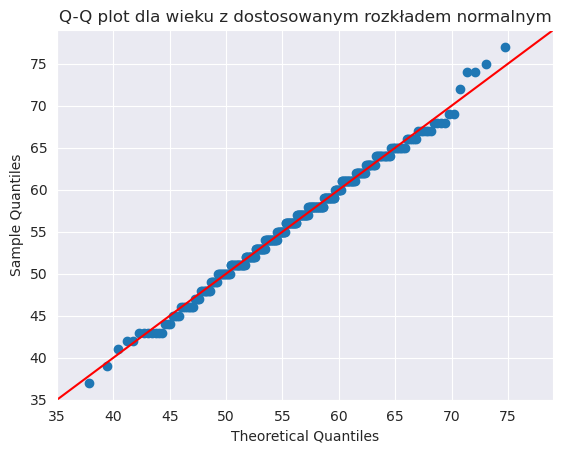

In [96]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(wiek, line='45', dist=norm, loc=mean_wiek, scale=std_wiek)
plt.title('Wykres kwantyl-kwantyl dla wieku z dostosowanym rozkładem normalnym')
plt.show()


Hipoteza zerowa - wartości zmiennej wiek pochodzą z rozkładu normalnego z parametrami (średnia_wieku, odchylenie_wieku).
Hipoteza alternatywna - wartości zmiennej wiek nie pochodzą z tego rozkładu.

Powyżej przeprowadziłem test Kołmogorowa-Smirnowa dla rozkładu normalnego z konkretnymi parametrami i otrzymałem małą wartość statystyki. Do tego otrzymałem p-wartość większą niż ustalony poziom istotności. Stąd nie mam dowodów na odrzucenie hipotezy zerowej o pochodzeniu tych danych z rozkładu normalnego. 

Niska wartość statystyki popiera hipotezę zerową, że dane pochodzą z rozkładu normalnego z danymi parametrami. Wykres Q-Q wzrokowo to potwierdza. Stwierdzam zatem, że z dużym prawdopodobieństwem dane pochodzą z rozkładu normalnego.

<h1>Zadanie 7</h1>

In [97]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = dane

data['plec'] = data['plec'].astype('category')
data['jednoos'] = data['jednoos'].astype('category')
data['miejsce'] = data['miejsce'].astype('category')

formula = 'wydatki_zyw ~ waga + wzrost + plec + dzieci + wiek + dochod + oszczednosci + jednoos + miejsce'
model = smf.ols(formula, data=data).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.51e-66
Time:                        22:54:09   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      226.2224     90.953      2.487   

Oto wyniki dopasowanie najprostszego modelu regresji liniowej, bez form funkcyjnych ani transformacji zmiennych. 

Wartość R-squared to aż 67% co oznacza, że wydatki żywnościowe są wyjaśniane przez zmienne niezależne aż w 67%, co jest dobrym wynikiem. 

Wartość F-statiscics na poziomie 61 i Prob(F-statiscic) mówi nam, że model jest istotny statystycznie. Dokładniej, choć jeden z predykatorów ma statystycznie istotny wpływ na zmienną zależną.  

Patrząc na p-value predykatorów widać, że niektóre wpływają na wartości zmiennej objaśnianej, szczególnie dochód i oszczędności (bo przy niskiim p-value mają wysokie wartości t) mają istotny wpływ. Dzieci również wykazują statystyczną istotność.

Test Shapiro-Wilka : statystyka=0.803, p-wartość=0.000
Statystyka Durbin-Watsona: 2.1007991181625645


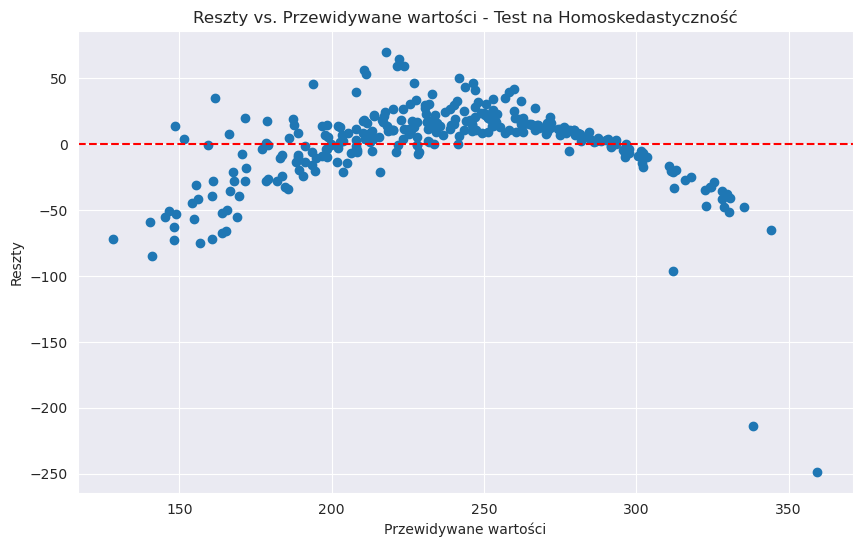

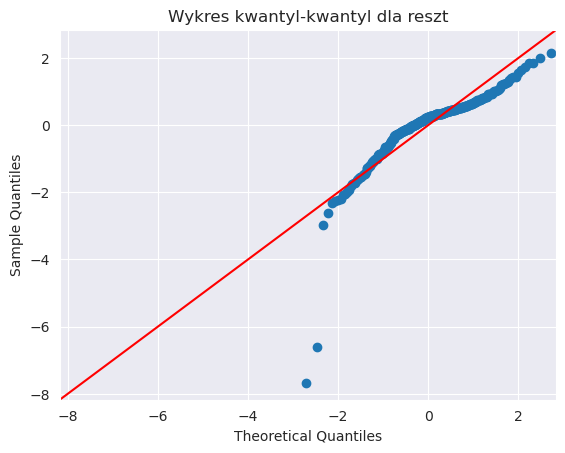

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')
plt.title('Reszty vs. Przewidywane wartości - Test na Homoskedastyczność')


fig = sm.qqplot(model.resid, line='45', fit=True)
plt.title('Wykres kwantyl-kwantyl dla reszt')

stat, p = shapiro(model.resid)
print('Test Shapiro-Wilka : statystyka=%.3f, p-wartość=%.3f' % (stat, p))

print('Statystyka Durbin-Watsona:', sm.stats.durbin_watson(model.resid))


Test Durbina-Watsona na poziomie około 2 oznacza brak lub bardzo delikatną autokorelacje - co jest dobrą wiadomością.

Za to wykres pokazujące róznice między resztami a przewidywanymi wartościami ukazuje, że dane raczej nie maja cechy homoskedastyczności, gdyż dane nie mają stałego rozrzutu wokół prostej na poziomie 0.

Jednak najbardziej niepokojące są wyniki testu Shapiro-Wilka, powierdzające to co widać na wykresie kwantyl-kwantyl, bo oznacza to, że rozkład próbki danych (reszt) nie odpowiada rozkładowi normalnemu. Wartość statystyki Shapiro-Wilka odległa od 1 i p-wartość, pozwalająca odrzuić hipotezę zerową o normalności rozkładu reszt.

To oznacze, że trzeba pomajstrować przy formach funkcyjnych albo transformacji zmiennych, aby rokład był normalny.

In [99]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

data = dane

data = pd.get_dummies(data, columns=['plec', 'jednoos', 'miejsce'], drop_first=True)

model = ols('wydatki_zyw ~ waga + wzrost + plec_2 + dzieci + wiek + dochod + oszczednosci + jednoos_1 + miejsce_2 + miejsce_3', data=data).fit()

X = model.model.exog
X = pd.DataFrame(X, columns=model.model.exog_names)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



              feature          VIF
0           Intercept  2310.884983
1      plec_2[T.True]     2.625501
2   jednoos_1[T.True]     2.422016
3   miejsce_2[T.True]     1.500755
4   miejsce_3[T.True]     1.499050
5                waga     1.731495
6              wzrost     2.248774
7              dzieci     1.028401
8                wiek     1.203732
9              dochod     9.216374
10       oszczednosci    11.222733


Badam niedokładną współliniowość licząc wartości VIF (Variance Inflation Factor). 

Okazuje się, że ten problem zachodzi dla zmiennych dochod i oszczednosci (VIF factor > 10). Przyczyna może być ich wysoka wzajemna korealcja (0.95).

In [100]:
import statsmodels.api as sm

influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

high_leverage = leverage > 2 * np.mean(leverage)
high_cook = cooks_d > 4 / len(cooks_d)
high_residual = np.abs(standardized_residuals) > 2

outlier_indices = np.where(high_leverage | high_cook | high_residual)[0]

print(outlier_indices)

selected_rows = data.iloc[outlier_indices]
print(selected_rows)

[ 15  44  46  64  74  78  97 114 120 124 125 154 157 195 207 208 213 233
 235 272 285]
      id   waga  wzrost  dzieci  wiek   dochod  oszczednosci  wydatki_zyw  \
15   200  85.95  177.48       4    51  1346.34       1251.88        88.64   
44   296  78.32  172.04       2    50  3289.24       2640.79       286.58   
46   195  82.37  161.99       0    53  1336.33       1214.82        98.05   
64   259  86.57  175.83       1    64  1712.88       1659.56        56.52   
75   187  74.38  177.98       2    59  1273.03       1120.97       113.44   
79   206  76.12  159.02       0    77  1285.93       1099.46       125.00   
98   295  81.57  169.84       1    60  3110.79       2478.51       280.93   
115  300  78.18  167.66       0    65  3632.65       2463.14       216.29   
121  301  82.57  181.19       4    46  3751.99       2961.96       297.58   
125  181  83.78  174.48       2    51  1351.13       1234.60        99.49   
126  254  68.89  160.59       0    62  1659.38       1084.26      

In [101]:
valid_indices = [index for index in outlier_indices if index in data.index]

data_cleaned = data.drop(index=valid_indices)

print(data_cleaned)


      id   waga  wzrost  dzieci  wiek   dochod  oszczednosci  wydatki_zyw  \
0     52  78.93  176.20       5    59   979.01        673.17       194.96   
1    101  78.66  165.73       3    52  1043.36        543.89       259.20   
2    146  74.29  171.33       2    57  1227.69        773.20       244.41   
3    281  79.11  169.24       1    59  2356.74       1914.74       239.77   
4    167  79.23  177.78       1    48  1264.95        536.29       291.05   
..   ...    ...     ...     ...   ...      ...           ...          ...   
304  209  81.26  179.94       1    55  1535.14       1066.30       249.39   
305  136  77.59  170.41       3    62  1124.12        415.07       289.83   
306   13  72.39  163.27       1    61   701.51         44.23       282.16   
308  173  77.24  175.21       1    60  1182.43        710.35       246.36   
309  171  75.77  161.41       4    61  1258.84        663.98       276.53   

    klasa_zamoznosci  proporcja_zywnosc  plec_2  jednoos_1  miejsce_2  \
0 

Poniżej podejmuję próby polepszenia modelu.

Zaczynam od odrzucania kolejno wartości o niskim p-value - bo to oznacza, że ich wkład w predykcje jest nieznaczący statystycznie.

Dostaję modele o co raz wyższym F-statistics co jest dobrym znakiem i podobnym R-squared.

Za to wykres reszt wygląda trochę lepiej i test Shapiro-Wilka daje odrobine lepszą wartość. Statystyka Durbin-Watsona również się polepsza.

In [102]:
formula = 'wydatki_zyw ~ plec_2 + dzieci + wiek + dochod + oszczednosci + jednoos_1 + miejsce_2 + miejsce_3'
model = smf.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     77.75
Date:                Sun, 12 May 2024   Prob (F-statistic):           3.94e-68
Time:                        22:54:10   Log-Likelihood:                -1488.8
No. Observations:                 304   AIC:                             2996.
Df Residuals:                     295   BIC:                             3029.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           173.6778     18.16

In [103]:
formula = 'wydatki_zyw ~ plec_2 + dzieci + wiek + dochod + oszczednosci + jednoos_1'
model = smf.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.17e-69
Time:                        22:54:10   Log-Likelihood:                -1490.0
No. Observations:                 304   AIC:                             2994.
Df Residuals:                     297   BIC:                             3020.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           174.0252     17.93

In [104]:
formula = 'wydatki_zyw ~ dzieci + dochod + oszczednosci + jednoos_1'
model = smf.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     153.4
Date:                Sun, 12 May 2024   Prob (F-statistic):           3.72e-71
Time:                        22:54:11   Log-Likelihood:                -1491.6
No. Observations:                 304   AIC:                             2993.
Df Residuals:                     299   BIC:                             3012.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           153.6278      6.43

Test Shapiro-Wilka : statystyka=0.798, p-wartość=0.000
Statystyka Durbin-Watsona: 2.0916807870970873


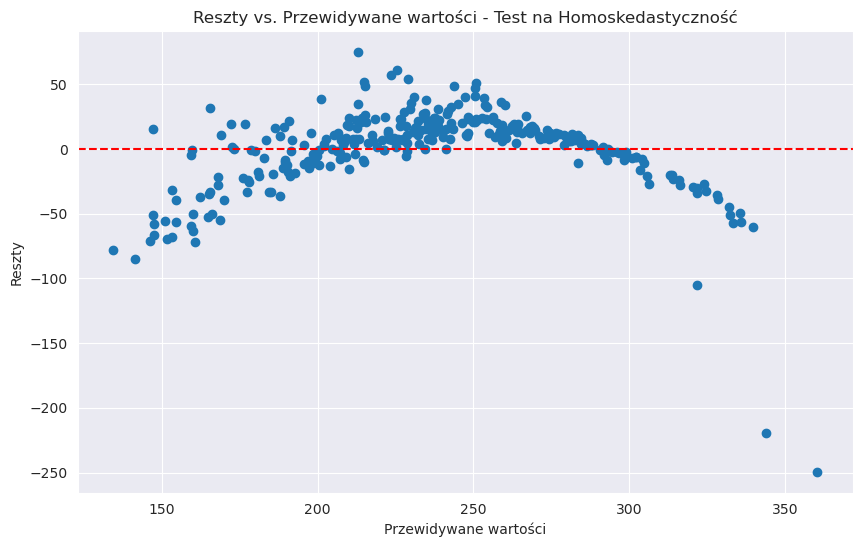

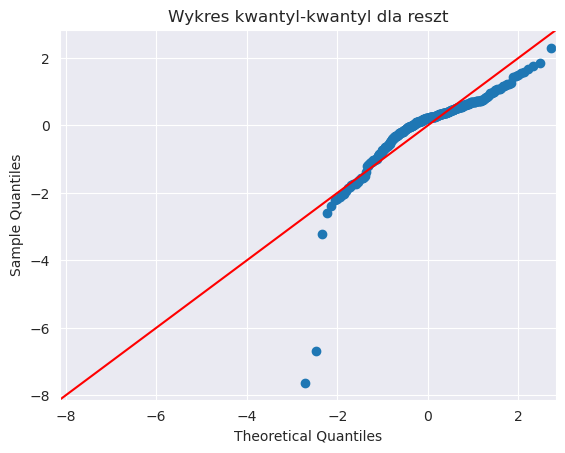

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')
plt.title('Reszty vs. Przewidywane wartości - Test na Homoskedastyczność')


fig = sm.qqplot(model.resid, line='45', fit=True)
plt.title('Wykres kwantyl-kwantyl dla reszt')

stat, p = shapiro(model.resid)
print('Test Shapiro-Wilka : statystyka=%.3f, p-wartość=%.3f' % (stat, p))

print('Statystyka Durbin-Watsona:', sm.stats.durbin_watson(model.resid))

Jednak przełomowym odkryciem jest spojrzenie na scatterplot dochodow - oszczednosci (co mozna interpretowac jak pieniądze, ktore sie wydaje) od wydatkow zywnosciowych.

Widać tutaj piękną parabolę z wierzchołkiem na poziomie 800. To podsuwa mi pomysł aby zastosować transformacje (dochod - oszczednosci)^2

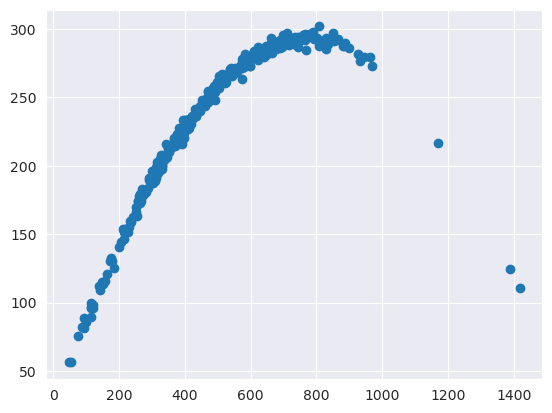

In [106]:
dochod = dane['dochod']
wydatki_zyw = dane['wydatki_zyw']
oszczednosci = dane['oszczednosci']
plt.scatter((dochod - oszczednosci), wydatki_zyw)
plt.show()

In [107]:
formula = 'wydatki_zyw ~ dzieci + jednoos_1 + I((dochod - oszczednosci) ** 2)'
model = smf.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     59.52
Date:                Sun, 12 May 2024   Prob (F-statistic):           3.23e-30
Time:                        22:54:12   Log-Likelihood:                -1590.2
No. Observations:                 304   AIC:                             3188.
Df Residuals:                     300   BIC:                             3203.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Jak widać nie daje to zamierzonych efektów - R-squared i F-statistics mocno zmalało. Przypominam sobie, więc że wiem gdzie jest wierzchołek paraboli i to że jest ona odwrócona.

To oznacza, że powinienem zastosować transformacje (800 - (dochod - oszczednosci))^2 - i to okazuje sie strzałem w dziesiątkę.

In [108]:
formula = 'wydatki_zyw ~ dzieci + jednoos_1 + I((800 - (dochod - oszczednosci)) ** 2)'
model = smf.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.531e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        22:54:12   Log-Likelihood:                -819.47
No. Observations:                 304   AIC:                             1647.
Df Residuals:                     300   BIC:                             1662.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Niesamowicie wysokie R-squared i F-statistics mówi mi, że to jest najlepszy model. Poniżej wykresy wyglądają już dużo lepiej - Reszty układają się równomiernie wokół prostej na poziomie 0, a na wykresie kwantyl-kwantyl widać dosyć dobre dopasowane.

Wartość statystyki D-W jest niesamowicie bliska 2, a test Shapiro-Wilka z niskim p-value daje wynik bliski 1, czyli reszty pochodzą z rozkładu normalnego.

To oznacza, że ten model spełnia założenia KMRL.

Test Shapiro-Wilka : statystyka=0.889, p-wartość=0.000
Statystyka Durbin-Watsona: 2.0895239015081697


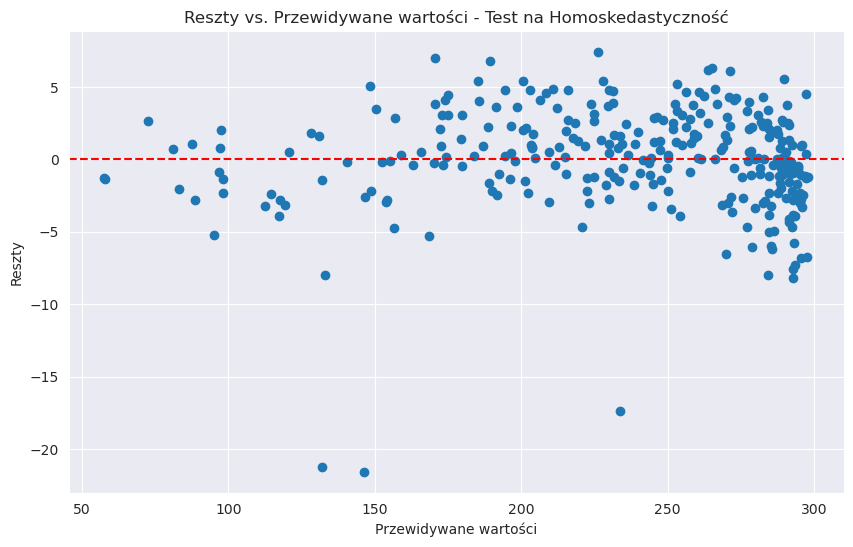

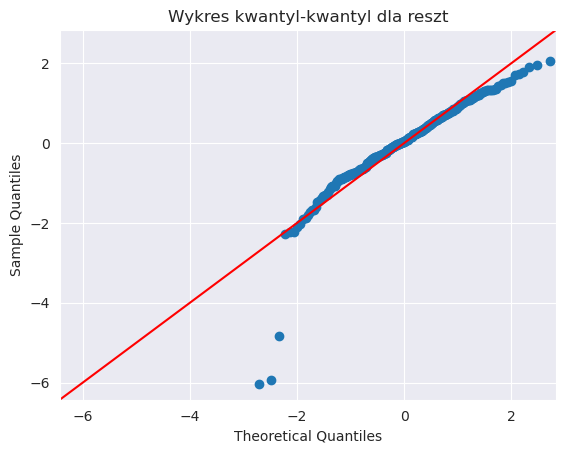

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')
plt.title('Reszty vs. Przewidywane wartości - Test na Homoskedastyczność')


fig = sm.qqplot(model.resid, line='45', fit=True)
plt.title('Wykres kwantyl-kwantyl dla reszt')

stat, p = shapiro(model.resid)
print('Test Shapiro-Wilka : statystyka=%.3f, p-wartość=%.3f' % (stat, p))

print('Statystyka Durbin-Watsona:', sm.stats.durbin_watson(model.resid))

Interpretacja zmiennej dzieci:

Współczynnik dla zmiennej dzieci wynosi 1.5671. Oznacza to, że przyrost jednego dziecka (przy założeniu stałości pozostałych zmiennych) jest przewidywany do zwiększenia wydatków na żywność o średnio 1.5671 bajtalarów. Ta zmienna ma niską p-wartość (mniejszą niż 0.01), co wskazuje, że jej wpływ na wydatki na żywność jest statystycznie istotny.
Interpretacja transformacji dochodu i oszczędności:

Zmienna I((800 - (dochod - oszczednosci)) ** 2) to transformacja kwadratowa, która w tym przypadku może służyć do modelowania nieliniowego efektu dochodów netto (dochód minus oszczędności) na wydatki na żywność. Współczynnik tej zmiennej wynosi -0.0004.

To oznacza, że wzrost kwadratu wartości 800−(dochod−oszczednosci) o jednostkę jest związany ze spadkiem przewidywanych wydatków na żywność o 0.0004 bajtalarów. To wskazuje, że im bliżej dochody netto są do 800 bajtalarów, tym wyższe są wydatki na żywność, ale po przekroczeniu tego progu (gdy dochody netto są większe lub mniejsze od 800 bajtalarów) wydatki zaczynają spadać. Tutaj również współczynnik jest statystycznie istotny ze względu na bardzo niską p-wartość.

Uwagi Końcowe:

- Stała (Intercept), mimo że nie interpretujemy jej ilościowo w kontekście wpływu, wskazuje na przewidywane wydatki na żywność dla przeciętnego gospodarstwa domowego (bez dzieci, z dochodem netto równym 800 bajtalarów), ale nie analizujemy jej głębiej zgodnie z zaleceniem w zadaniu.
- 
- R-squared (0.996) i Adjusted R-squared (0.996) są bardzo wysokie, co sugeruje, że model bardzo dobrze wyjaśnia zmienność wydatków na żywność w danych. Jednak należy uważać na potencjalne przeuczenie (overfitting) modelu.
- 
- Istotność F-statystyki wskazuje, że model jako całość jest bardzo istotny statystycznie.